In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd 
import seaborn as sns

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Input
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv("fifa_19.csv",encoding='latin1')
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31.0,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94.0,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226.5M
1,1,20801,Cristiano Ronaldo,33.0,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94.0,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127.1M
2,2,190871,Neymar Jr,26.0,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92.0,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228.1M
3,3,193080,De Gea,27.0,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91.0,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138.6M
4,4,192985,K. De Bruyne,27.0,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91.0,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196.4M


In [3]:
df.shape

(18207, 89)

C:\Users\Shriya Bhat\AppData\Local\Temp\ipykernel_10420\3462167945.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  'GKKicking', 'GKPositioning', 'GKReflexes']].corr(), annot = True, linewidths=.5, cmap='Blues')


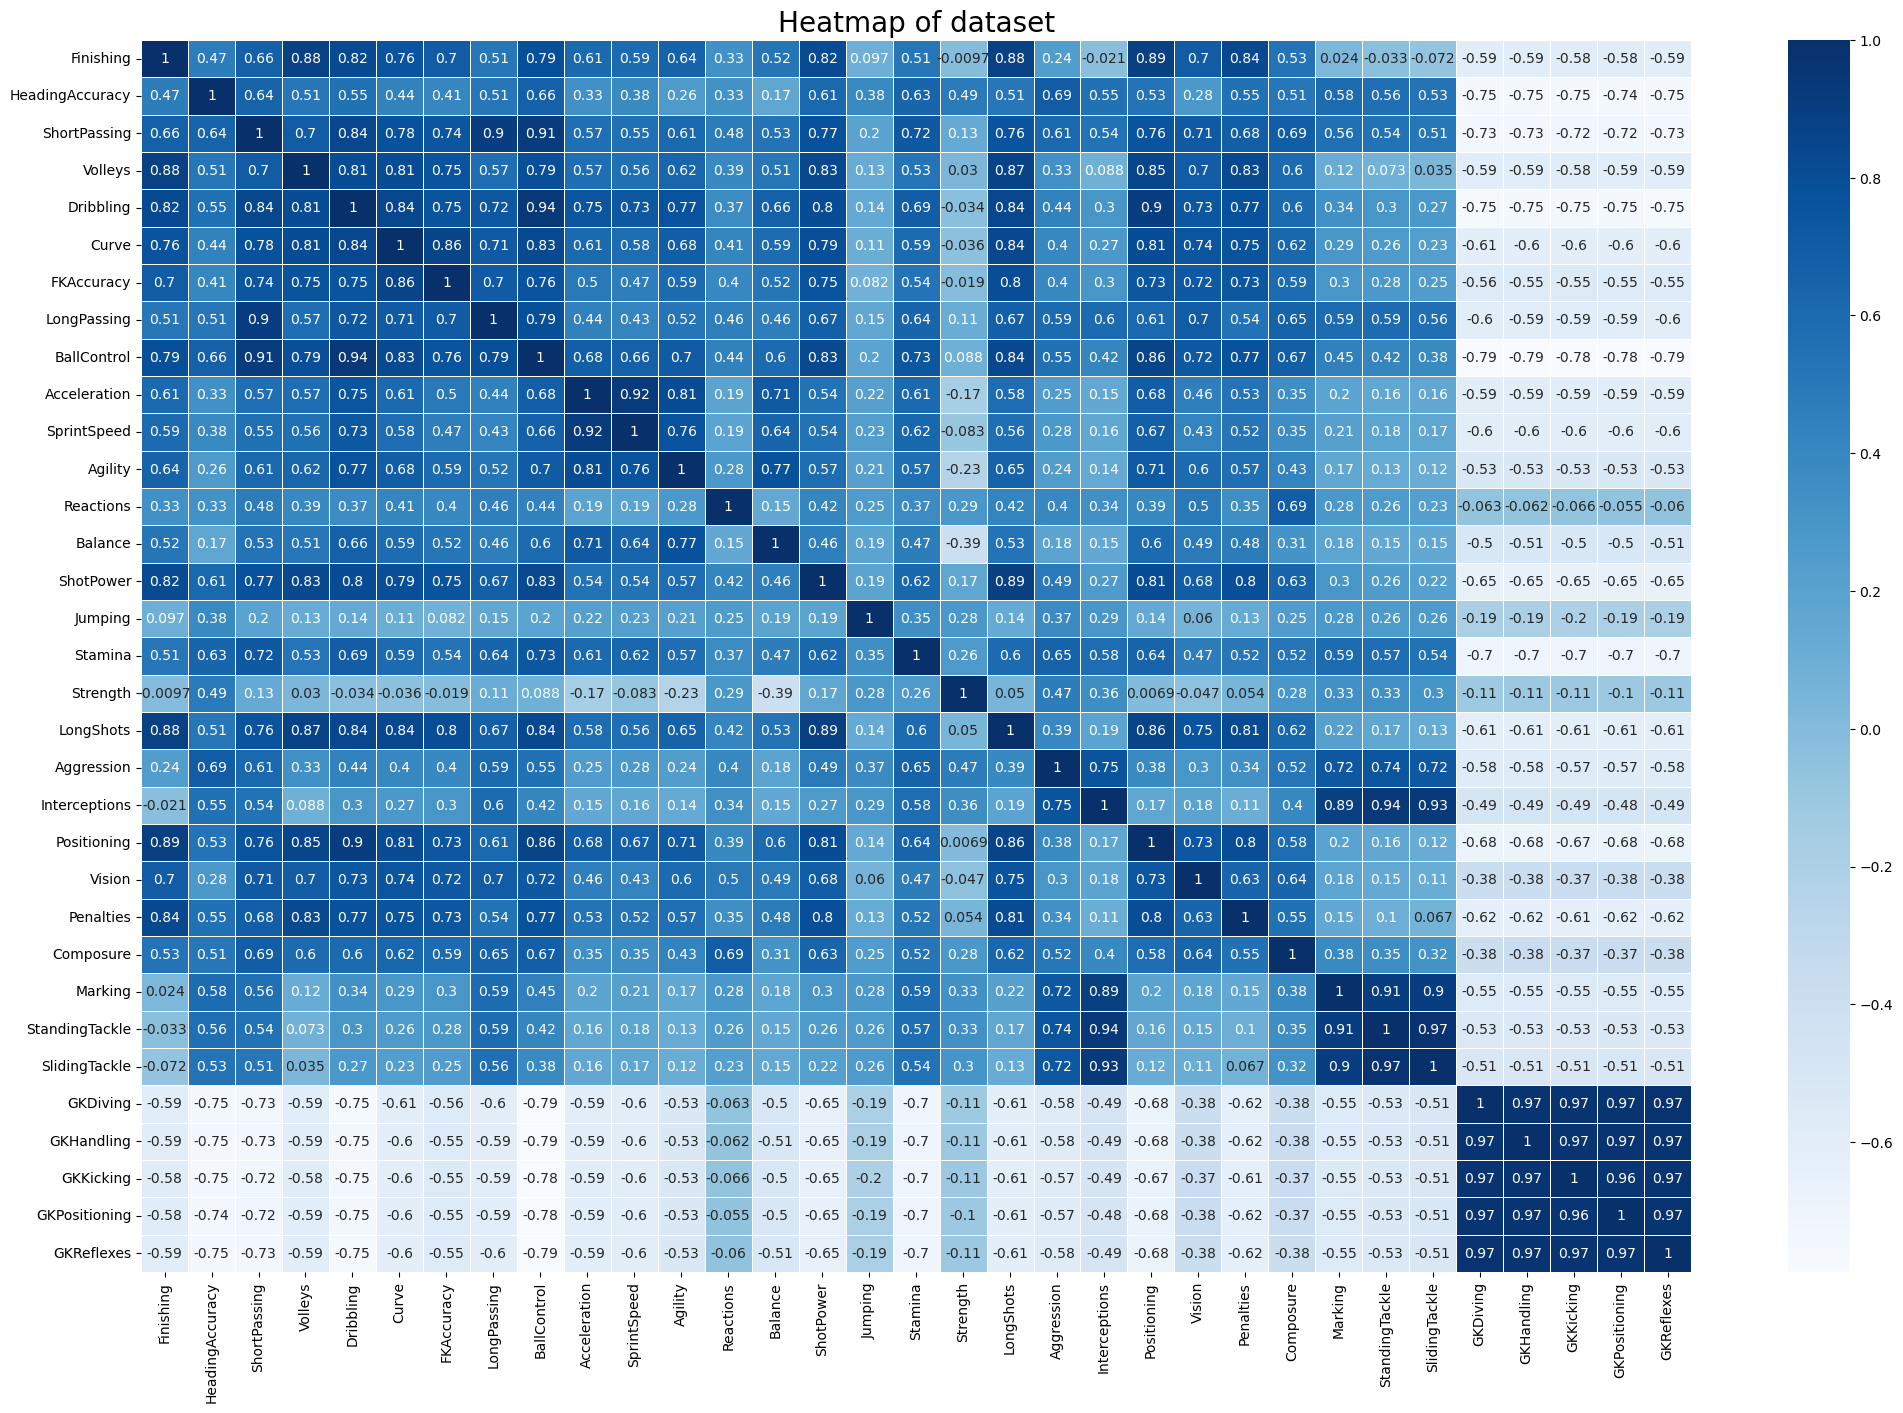

In [4]:
# Correlation heatmap
plt.rcParams['figure.figsize']=(25,16)
hm=sns.heatmap(df[["Position", 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes']].corr(), annot = True, linewidths=.5, cmap='Blues')
hm.set_title(label='Heatmap of dataset', fontsize=20)
hm;

In [5]:
# Remove Missing Values 
na = pd.notnull(df["Position"])
df = df[na]
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31.0,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94.0,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226.5M
1,1,20801,Cristiano Ronaldo,33.0,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94.0,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127.1M
2,2,190871,Neymar Jr,26.0,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92.0,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228.1M
3,3,193080,De Gea,27.0,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91.0,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138.6M
4,4,192985,K. De Bruyne,27.0,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91.0,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196.4M


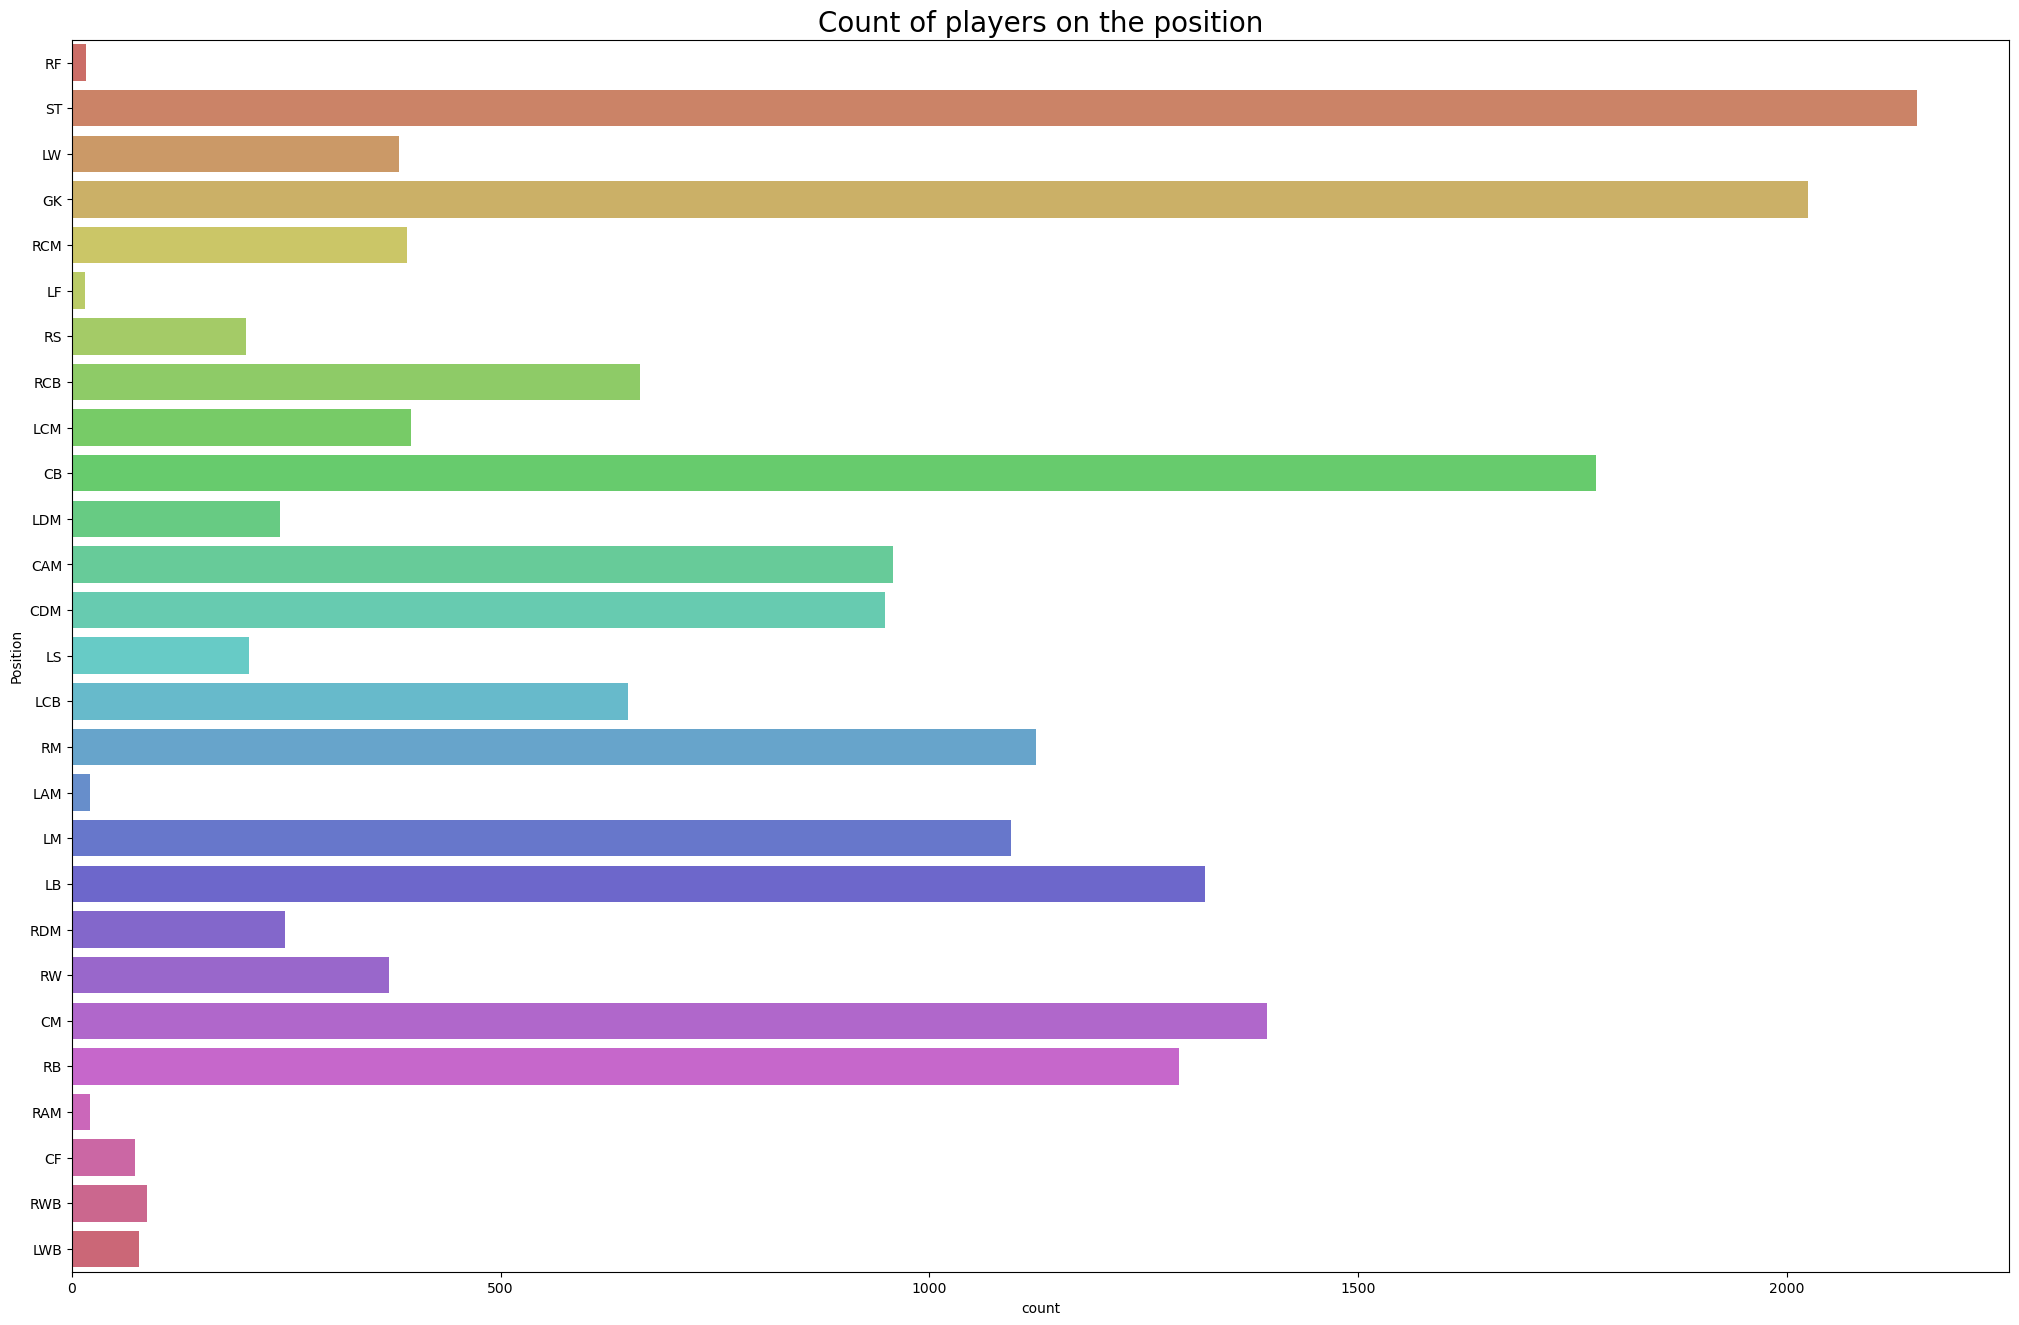

In [6]:
# All of position
ax = sns.countplot(y = 'Position', data = df, palette = 'hls');
ax.set_title(label='Count of players on the position', fontsize=20);

In [7]:
df = df[["Position", 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes']]
df.head()

,Position,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,RF,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,ST,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,LW,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,GK,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,RCM,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [8]:
forward_player = ["ST", "LW", "RW", "LF", "RF", "RS","LS", "CF"]
midfielder_player = ["CM","RCM","LCM", "CDM","RDM","LDM", "CAM", "LAM", "RAM", "RM", "LM"]
defender_player = ["CB", "RCB", "LCB", "LWB", "RWB", "LB", "RB"]

In [9]:
df.loc[df["Position"] == "GK", "Position"] = 0
df.loc[df["Position"].isin(defender_player), "Position"] = 1
df.loc[df["Position"].isin(midfielder_player), "Position"] = 2
df.loc[df["Position"].isin(forward_player), "Position"] = 3

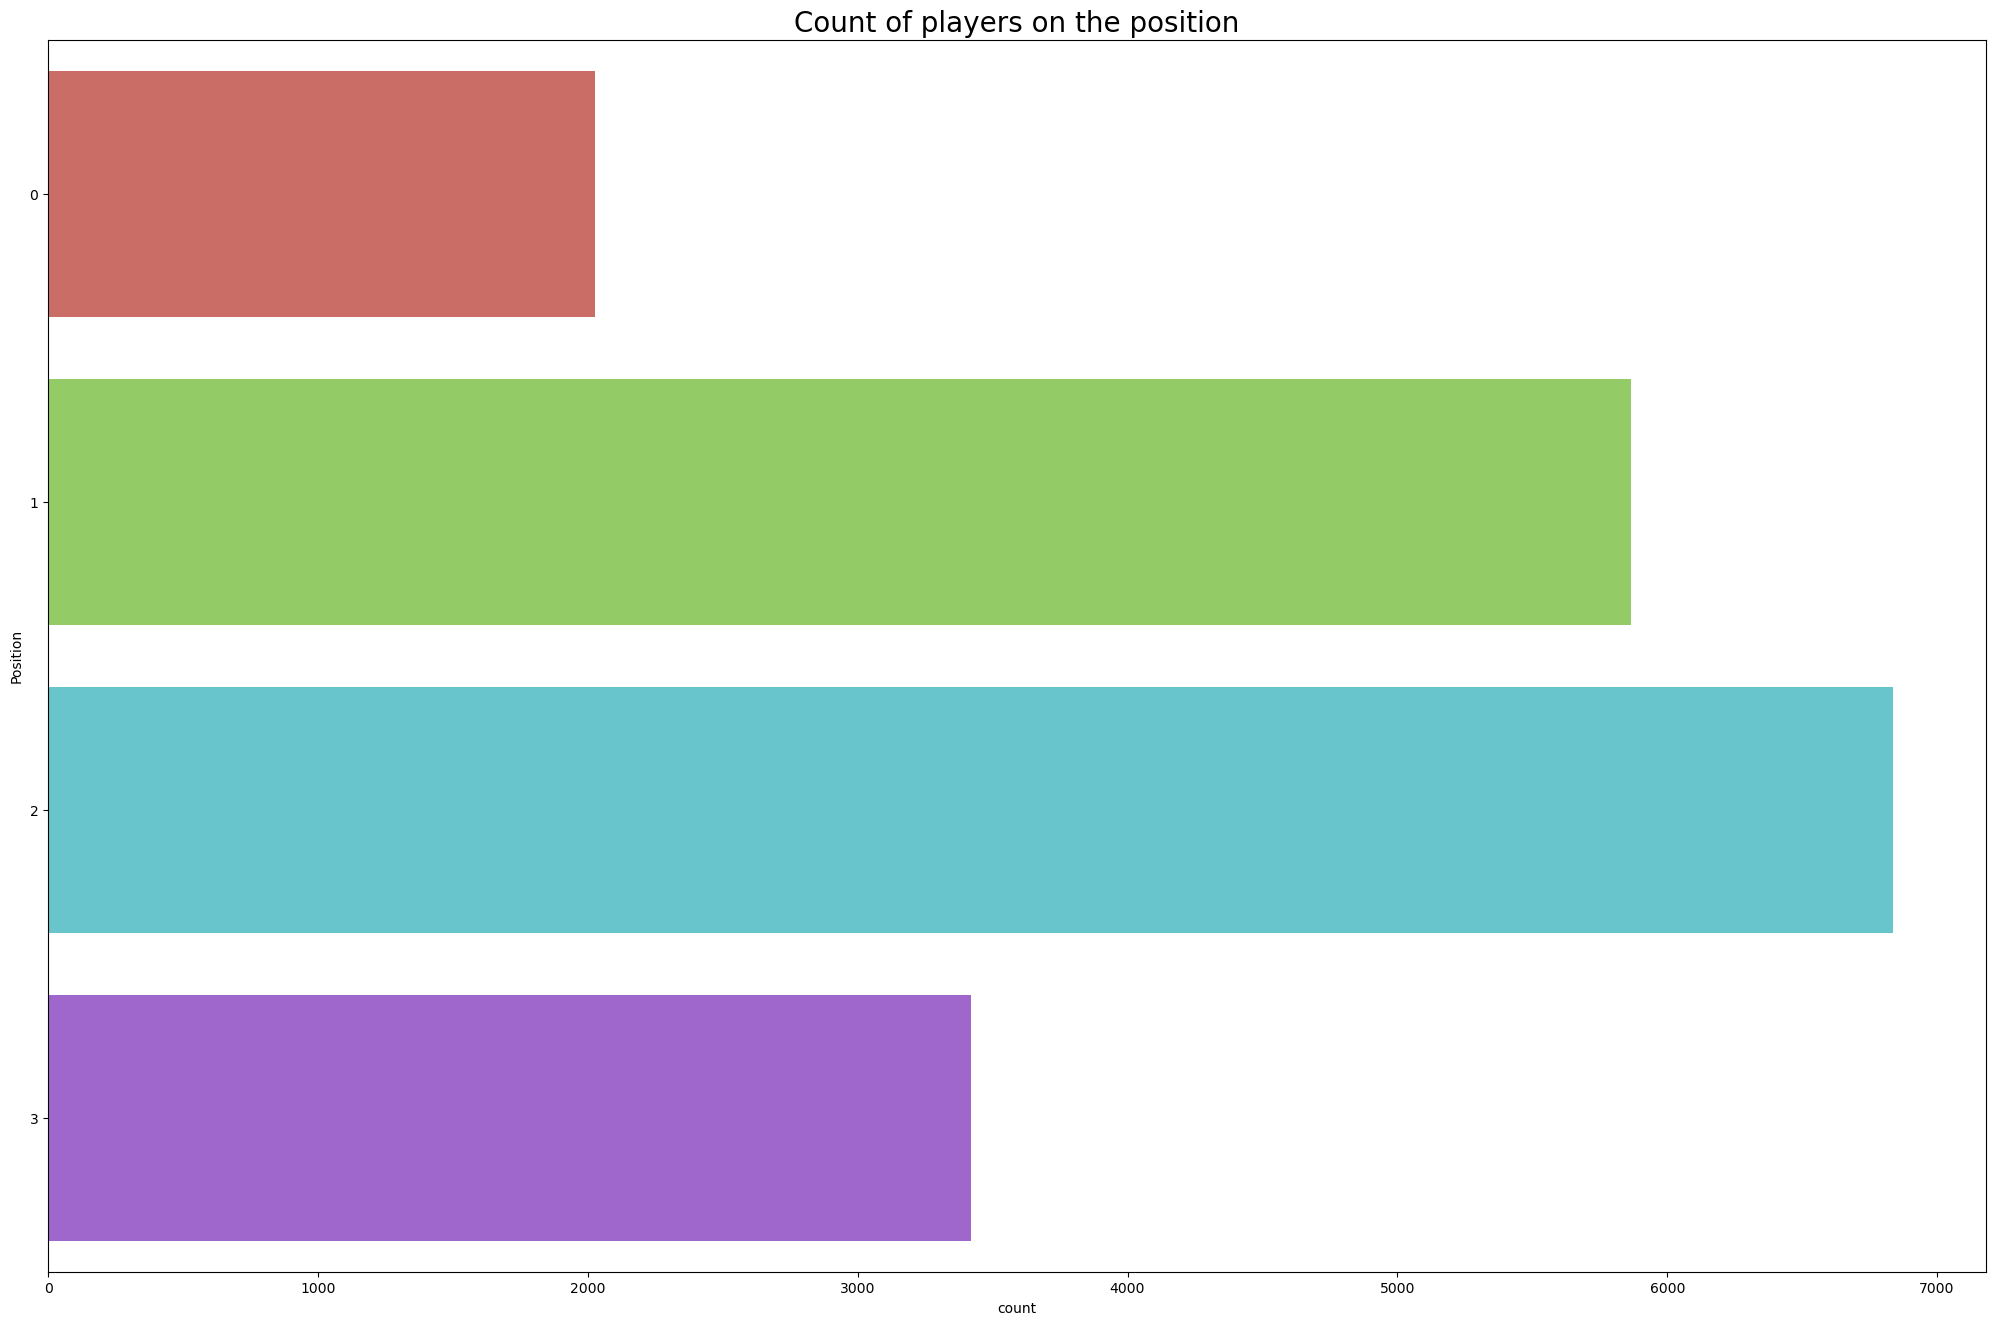

In [10]:
# All of position
ax = sns.countplot(y = 'Position', data = df, palette = 'hls');
ax.set_title(label='Count of players on the position', fontsize=20);

In [11]:
x = df.drop("Position", axis = 1)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = pd.DataFrame(sc.fit_transform(x))
y = df["Position"]
x.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,2.532391,1.018293,2.130190,2.434969,2.201010,2.491028,2.925359,2.236808,2.255005,1.767403,...,1.684657,3.265669,-0.717896,-0.909470,-0.923850,-0.599889,-0.318983,-0.074713,-0.140266,-0.485159
1,2.481180,2.111424,1.517765,2.491481,1.725114,1.838695,1.895584,1.584271,2.135138,1.633444,...,2.321491,3.178232,-0.969153,-0.770985,-1.064778,-0.543386,-0.318983,-0.074713,-0.140266,-0.318094
2,2.122700,0.558028,1.721906,2.321945,2.148132,2.219223,2.524891,1.649524,2.195072,1.968342,...,2.066757,3.090795,-1.019405,-1.094116,-0.595016,-0.430379,-0.437259,-0.074713,-0.081569,-0.318094
3,-1.666942,-1.800833,-0.591700,-1.690394,-1.976298,-1.422972,-1.365369,-0.112327,-0.981399,-0.509905,...,-0.544262,0.817436,-1.622423,-1.232601,-1.534540,4.146377,4.057254,4.287959,4.203333,4.304052
4,1.866643,0.155296,2.266284,2.208922,1.619359,2.056139,2.296052,2.497823,1.955338,0.896668,...,1.939390,2.566174,1.040907,0.475378,0.250555,-0.091360,-0.200706,-0.680640,-0.375055,-0.206717


In [12]:
y.head()

0    3
1    3
2    3
3    0
4    2
Name: Position, dtype: object

In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Position']=le.fit_transform(df['Position'])

In [14]:
x = df.drop("Position", axis = 1)
sc = StandardScaler() 
X =pd.DataFrame(sc.fit_transform(x)) 
y = df["Position"]

In [15]:
y

0        3
1        3
2        3
3        0
4        2
        ..
18202    2
18203    3
18204    3
18205    3
18206    2
Name: Position, Length: 18147, dtype: int32

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_testval,y_train,y_testval=train_test_split(X, y, test_size=0.2)
X_test,X_val,y_test,y_val=train_test_split(X_testval, y_testval, test_size=0.5)

In [17]:
print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 14517
Validation set size: 1815
Test set size: 1815


#### Model with 1 hidden layer 

Epoch 1/10
454/454 [==============================] - 3s 4ms/step - loss: 0.5323 - accuracy: 0.8083 - val_loss: 0.3371 - val_accuracy: 0.8501
Epoch 2/10
454/454 [==============================] - 1s 3ms/step - loss: 0.3214 - accuracy: 0.8662 - val_loss: 0.3194 - val_accuracy: 0.8645
Epoch 3/10
454/454 [==============================] - 1s 3ms/step - loss: 0.3132 - accuracy: 0.8720 - val_loss: 0.3123 - val_accuracy: 0.8799
Epoch 4/10
454/454 [==============================] - 1s 3ms/step - loss: 0.3099 - accuracy: 0.8732 - val_loss: 0.3070 - val_accuracy: 0.8733
Epoch 5/10
454/454 [==============================] - 1s 3ms/step - loss: 0.3070 - accuracy: 0.8750 - val_loss: 0.3097 - val_accuracy: 0.8744
Epoch 6/10
454/454 [==============================] - 1s 3ms/step - loss: 0.3056 - accuracy: 0.8755 - val_loss: 0.3083 - val_accuracy: 0.8749
Epoch 7/10
454/454 [==============================] - 1s 3ms/step - loss: 0.3026 - accuracy: 0.8729 - val_loss: 0.3059 - val_accuracy: 0.8733
Epoch 

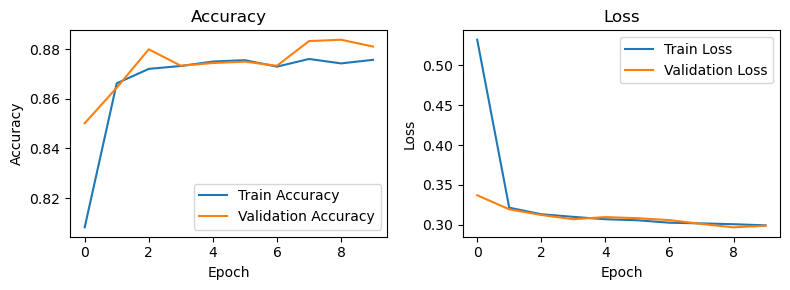

In [23]:
from sklearn.metrics import precision_score, recall_score

model = Sequential([
            Input(shape=(X_train.shape[1],), name='input'),
            Dense(5, activation='relu', name='d1'),
            Dense(27, activation='Softmax')
        ])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

#### Model with 2 hidden layers

Epoch 1/10
454/454 [==============================] - 3s 4ms/step - loss: 0.4940 - accuracy: 0.8088 - val_loss: 0.3052 - val_accuracy: 0.8755
Epoch 2/10
454/454 [==============================] - 1s 3ms/step - loss: 0.3171 - accuracy: 0.8685 - val_loss: 0.3108 - val_accuracy: 0.8656
Epoch 3/10
454/454 [==============================] - 1s 3ms/step - loss: 0.3043 - accuracy: 0.8734 - val_loss: 0.3111 - val_accuracy: 0.8716
Epoch 4/10
454/454 [==============================] - 1s 3ms/step - loss: 0.2998 - accuracy: 0.8729 - val_loss: 0.3048 - val_accuracy: 0.8711
Epoch 5/10
454/454 [==============================] - 1s 3ms/step - loss: 0.2999 - accuracy: 0.8746 - val_loss: 0.3039 - val_accuracy: 0.8766
Epoch 6/10
454/454 [==============================] - 1s 3ms/step - loss: 0.2935 - accuracy: 0.8760 - val_loss: 0.3077 - val_accuracy: 0.8804
Epoch 7/10
454/454 [==============================] - 1s 3ms/step - loss: 0.2931 - accuracy: 0.8793 - val_loss: 0.3150 - val_accuracy: 0.8689
Epoch 

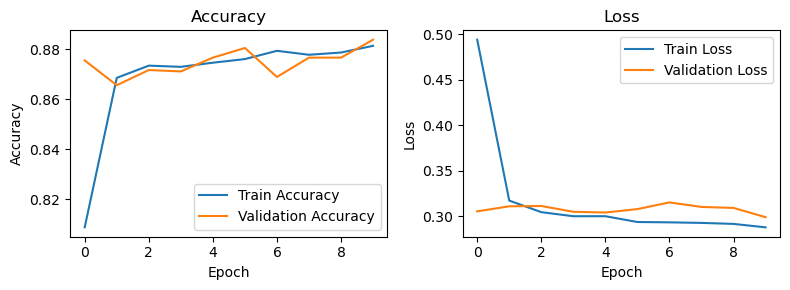

In [24]:
from sklearn.metrics import precision_score, recall_score

model = Sequential([
            Input(shape=(X_train.shape[1],), name='input'),
            Dense(10, activation='relu', name='d1'),
            Dense(5, activation='relu', name='d2'),
            Dense(27, activation='Softmax')
        ])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

##### model with 3 hidden layers

Epoch 1/10
454/454 [==============================] - 3s 4ms/step - loss: 0.6002 - accuracy: 0.8216 - val_loss: 0.3634 - val_accuracy: 0.8606
Epoch 2/10
454/454 [==============================] - 1s 3ms/step - loss: 0.3350 - accuracy: 0.8664 - val_loss: 0.3489 - val_accuracy: 0.8601
Epoch 3/10
454/454 [==============================] - 1s 3ms/step - loss: 0.3161 - accuracy: 0.8723 - val_loss: 0.3216 - val_accuracy: 0.8722
Epoch 4/10
454/454 [==============================] - 1s 3ms/step - loss: 0.3065 - accuracy: 0.8726 - val_loss: 0.3023 - val_accuracy: 0.8821
Epoch 5/10
454/454 [==============================] - 1s 3ms/step - loss: 0.3052 - accuracy: 0.8730 - val_loss: 0.3029 - val_accuracy: 0.8871
Epoch 6/10
454/454 [==============================] - 1s 3ms/step - loss: 0.3004 - accuracy: 0.8769 - val_loss: 0.2987 - val_accuracy: 0.8832
Epoch 7/10
454/454 [==============================] - 1s 3ms/step - loss: 0.2962 - accuracy: 0.8774 - val_loss: 0.3013 - val_accuracy: 0.8788
Epoch 

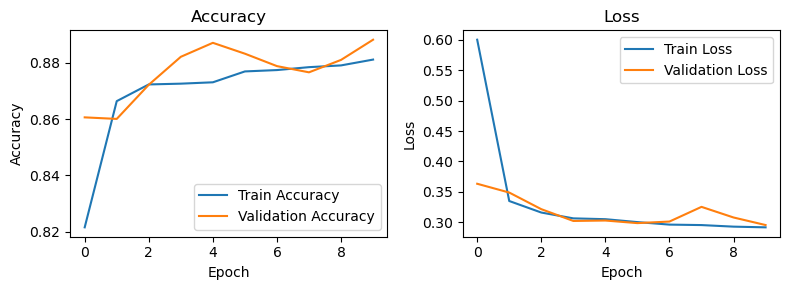

In [25]:
from sklearn.metrics import precision_score, recall_score

model = Sequential([
            Input(shape=(X_train.shape[1],), name='input'),
            Dense(12, activation='relu', name='d1'),
            Dense(8, activation='relu', name='d2'),
            Dense(4, activation='relu', name='d3'),
            Dense(27, activation='Softmax')
        ])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

- #### Increase in accuracy not seen since we have used the neural network for a tabular simple dataset.

Epoch 1/20
454/454 [==============================] - 3s 4ms/step - loss: 1.1378 - accuracy: 0.6463 - val_loss: 0.3996 - val_accuracy: 0.8303
Epoch 2/20
454/454 [==============================] - 1s 3ms/step - loss: 0.3606 - accuracy: 0.8453 - val_loss: 0.3284 - val_accuracy: 0.8650
Epoch 3/20
454/454 [==============================] - 1s 3ms/step - loss: 0.3197 - accuracy: 0.8662 - val_loss: 0.3158 - val_accuracy: 0.8722
Epoch 4/20
454/454 [==============================] - 1s 3ms/step - loss: 0.3080 - accuracy: 0.8697 - val_loss: 0.3163 - val_accuracy: 0.8628
Epoch 5/20
454/454 [==============================] - 1s 3ms/step - loss: 0.3032 - accuracy: 0.8735 - val_loss: 0.3039 - val_accuracy: 0.8749
Epoch 6/20
454/454 [==============================] - 1s 3ms/step - loss: 0.2984 - accuracy: 0.8761 - val_loss: 0.3003 - val_accuracy: 0.8804
Epoch 7/20
454/454 [==============================] - 1s 3ms/step - loss: 0.2952 - accuracy: 0.8765 - val_loss: 0.2986 - val_accuracy: 0.8804
Epoch 

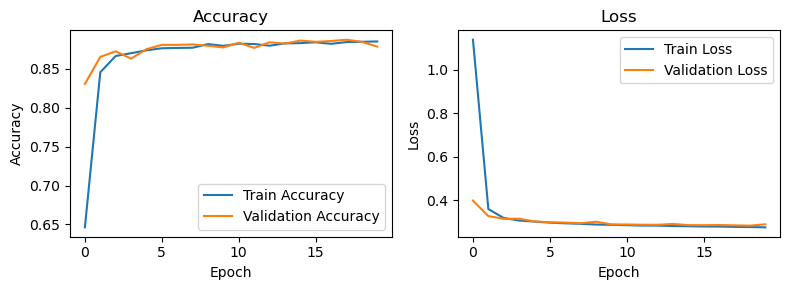

In [26]:
from sklearn.metrics import precision_score, recall_score

model = Sequential([
            Input(shape=(X_train.shape[1],), name='input'),
            Dense(16, activation='relu', name='d1'),
            Dense(8, activation='relu', name='d2'),
            Dense(27, activation='Softmax')
        ])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20)

loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

##### Trying out different learning rates

Epoch 1/40
454/454 [==============================] - 3s 4ms/step - loss: 1.3356 - accuracy: 0.5204 - val_loss: 0.5380 - val_accuracy: 0.7708
Epoch 2/40
454/454 [==============================] - 1s 3ms/step - loss: 0.4499 - accuracy: 0.8035 - val_loss: 0.3934 - val_accuracy: 0.8380
Epoch 3/40
454/454 [==============================] - 1s 3ms/step - loss: 0.3684 - accuracy: 0.8437 - val_loss: 0.3437 - val_accuracy: 0.8650
Epoch 4/40
454/454 [==============================] - 1s 3ms/step - loss: 0.3338 - accuracy: 0.8622 - val_loss: 0.3222 - val_accuracy: 0.8788
Epoch 5/40
454/454 [==============================] - 1s 3ms/step - loss: 0.3192 - accuracy: 0.8669 - val_loss: 0.3107 - val_accuracy: 0.8821
Epoch 6/40
454/454 [==============================] - 1s 3ms/step - loss: 0.3124 - accuracy: 0.8719 - val_loss: 0.3083 - val_accuracy: 0.8832
Epoch 7/40
454/454 [==============================] - 1s 3ms/step - loss: 0.3084 - accuracy: 0.8743 - val_loss: 0.3047 - val_accuracy: 0.8760
Epoch 

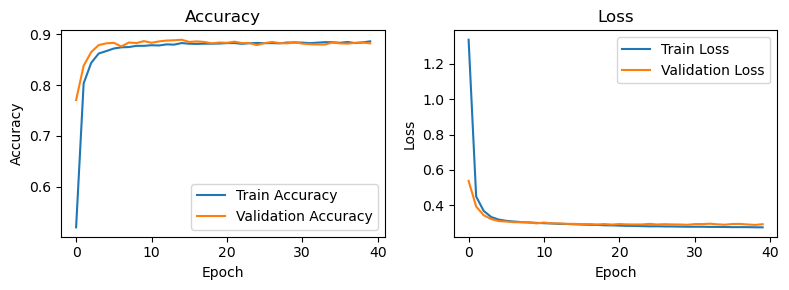

In [27]:
from sklearn.metrics import precision_score, recall_score

model = Sequential([
            Input(shape=(X_train.shape[1],), name='input'),
            Dense(10, activation='relu', name='d1'),
            Dense(5, activation='relu', name='d2'),
            Dense(27, activation='Softmax')
        ])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=40)

loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

Epoch 1/20
454/454 [==============================] - 3s 4ms/step - loss: 1.0845 - accuracy: 0.6589 - val_loss: 0.4106 - val_accuracy: 0.8325
Epoch 2/20
454/454 [==============================] - 1s 3ms/step - loss: 0.3745 - accuracy: 0.8372 - val_loss: 0.3434 - val_accuracy: 0.8540
Epoch 3/20
454/454 [==============================] - 1s 3ms/step - loss: 0.3332 - accuracy: 0.8580 - val_loss: 0.3221 - val_accuracy: 0.8694
Epoch 4/20
454/454 [==============================] - 1s 3ms/step - loss: 0.3160 - accuracy: 0.8653 - val_loss: 0.3121 - val_accuracy: 0.8694
Epoch 5/20
454/454 [==============================] - 1s 3ms/step - loss: 0.3075 - accuracy: 0.8723 - val_loss: 0.3039 - val_accuracy: 0.8766
Epoch 6/20
454/454 [==============================] - 1s 3ms/step - loss: 0.3025 - accuracy: 0.8736 - val_loss: 0.3022 - val_accuracy: 0.8744
Epoch 7/20
454/454 [==============================] - 1s 3ms/step - loss: 0.2992 - accuracy: 0.8768 - val_loss: 0.2987 - val_accuracy: 0.8793
Epoch 

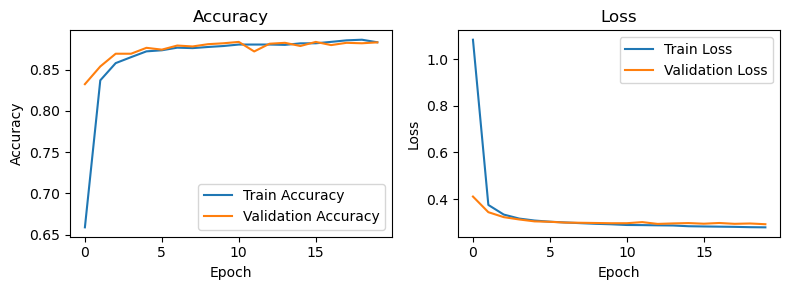

In [28]:
from sklearn.metrics import precision_score, recall_score

model = Sequential([
            Input(shape=(X_train.shape[1],), name='input'),
            Dense(16, activation='relu', name='d1'),
            Dense(8, activation='relu', name='d2'),
            Dense(27, activation='Softmax')
        ])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20)

loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

- learning rate 0.001
- epochs - 20
- 2 hidden layers,
is giving the best results so far